## Author: Paweł Jelonek <br> Date: 13.06.2021
### Machine learning course:<br> Lecture 5 - Unattended learning + feature engineering + team methods

In [93]:
import numpy as np
import matplotlib
from scipy.stats import norm
from sklearn.utils.fixes import parse_version
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.neighbors import KernelDensity
import warnings
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn import datasets # import inbuild datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
# library imports
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd
from pydataset import data
from sklearn.cluster import DBSCAN
%matplotlib inline

sns.set(style="white")
warnings.filterwarnings("ignore")


# plt.rcParams["figure.figsize"]=(20, 10)

Proszę opracować paradygmaty uczenia nienadzorowanego:
1.	klasteryzacja
2.	szacowanie gęstości rozkładu (kernel density estimation)
3.	detekcja wartości odstających

Inżynieria cech:
4.	metody selekcji cech
5.	zmniejszanie wymiarowości danych

Proszę opracować paradygmaty uczenia zespołowego:
6.	bagging
7.	boosting
8.	lasy losowe

W ramach danego paradygmatu uczenia przedstawić:
-	podstawy teoretyczne (krótko)
-	metody/typy
-   parametry, regularyzację, optymalizację
-	implementację (własną lub biblioteczną): uczenie, predykcja (testowanie)
-	typowe metryki wraz z metodami ich wyliczania
-	wizualizację: zbioru/modelu
-	uczenie na wybranym zbiorze danych (przy wielu metodach w ramach paradygmatu, na różnych zbiorach danych)

### 1.  klasteryzacja

### podstawy teoretycznie
Metoda klastrowania k-średnich to nienadzorowana technika uczenia maszynowego wykorzystywana do identyfikowania
klastrów obiektów danych w zestawie danych. Istnieje wiele różnych rodzajów metod grupowania, ale k-średnie jest
jedną z najstarszych i najbardziej przystępnych. Te cechy sprawiają, że implementacja klastrów k-średnich w Pythonie
jest dość prosta, nawet dla początkujących programistów i analityków danych.

In [94]:
def k_means_clustering(x: np.ndarray, y: np.ndarray, title: str):
    plt.scatter(x[:,0], x[:,1], c=y, cmap='gist_rainbow')
    plt.xlabel('{} Length'.format(title), fontsize=18)
    plt.ylabel('{} Width'.format(title), fontsize=18)
    km = KMeans(n_clusters = 3, random_state=1)
    km.fit(x)
    #this will tell us to which cluster does the data observations belong.
    new_labels = km.labels_
    # Plot the identified clusters and compare with the answers
    fig, axes = plt.subplots(1, 2, figsize=(16,8))
    plot_k_means(x[:, 0], x[:, 1], y, axes, title ,'Actual', 'gist_rainbow', 0)
    plot_k_means(x[:, 0], x[:, 1], new_labels, axes, title , 'Predicted', 'jet', 1)
    plt.show()

In [95]:
def plot_k_means(x: np.ndarray, y: np.ndarray, color: np.ndarray, axes: np.ndarray, title: str, result: str, cmap: str, position: int):
    axes[position].scatter(x, y, c=color, cmap=cmap,edgecolor='k', s=150)
    axes[position].set_xlabel('{} length'.format(title), fontsize=18)
    axes[position].set_ylabel('{} width'.format(title), fontsize=18)
    axes[position].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
    axes[position].set_title('{}'.format(result), fontsize=18)

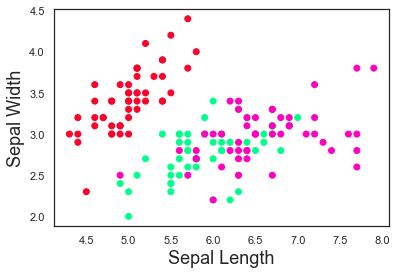

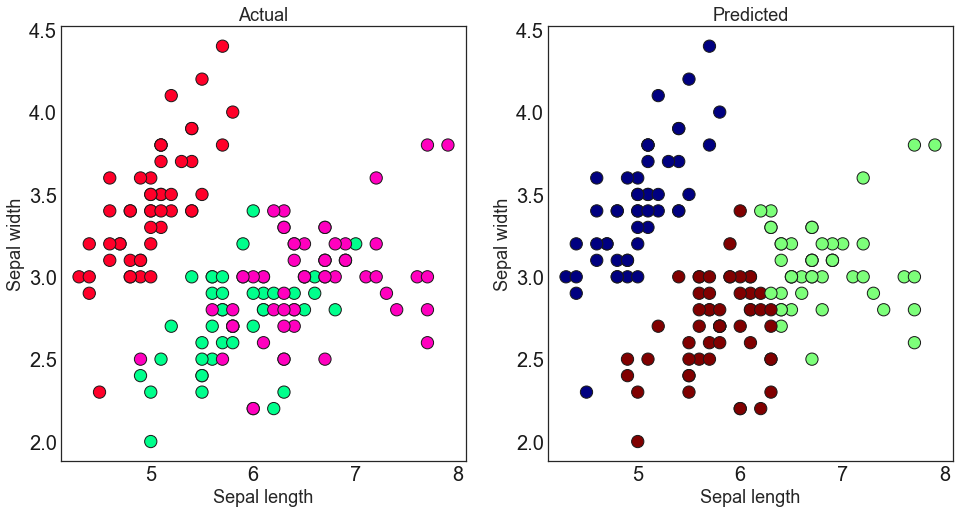

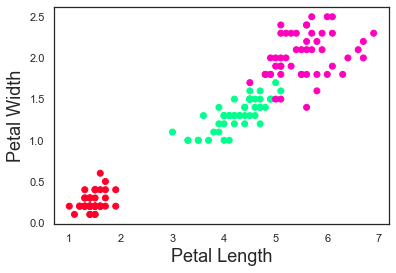

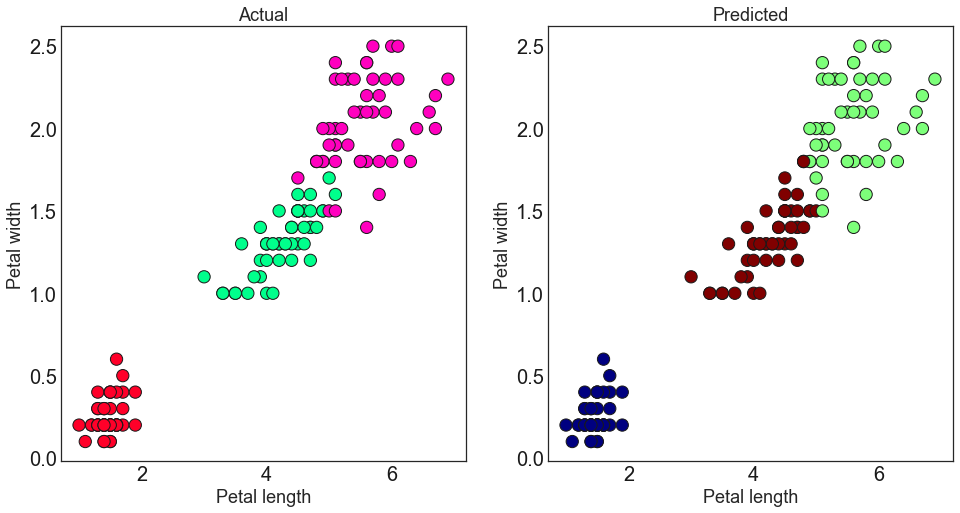

In [96]:
iris = datasets.load_iris()
k_means_clustering(iris.data[:, :2], iris.target, "Sepal")
k_means_clustering(iris.data[:, 2:4], iris.target, "Petal")

### 2.	szacowanie gęstości rozkładu (kernel density estimation)

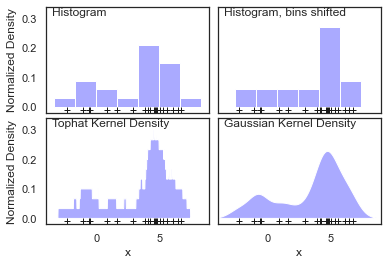

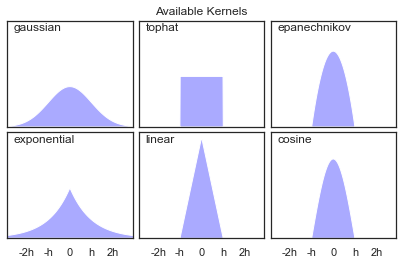

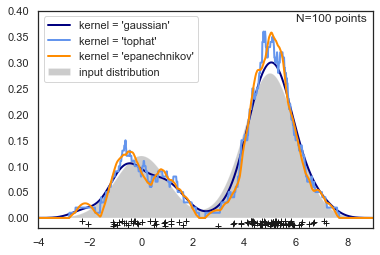

In [97]:

# `normed` is being deprecated in favor of `density` in histograms
if parse_version(matplotlib.__version__) >= parse_version('2.1'):
    density_param = {'density': True}
else:
    density_param = {'normed': True}

# ----------------------------------------------------------------------
# Plot the progression of histograms to kernels
np.random.seed(1)
N = 20
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
bins = np.linspace(-5, 10, 10)

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.05, wspace=0.05)

# histogram 1
ax[0, 0].hist(X[:, 0], bins=bins, fc='#AAAAFF', **density_param)
ax[0, 0].text(-3.5, 0.31, "Histogram")

# histogram 2
ax[0, 1].hist(X[:, 0], bins=bins + 0.75, fc='#AAAAFF', **density_param)
ax[0, 1].text(-3.5, 0.31, "Histogram, bins shifted")

# tophat KDE
kde = KernelDensity(kernel='tophat', bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax[1, 0].fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
ax[1, 0].text(-3.5, 0.31, "Tophat Kernel Density")

# Gaussian KDE
kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax[1, 1].fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
ax[1, 1].text(-3.5, 0.31, "Gaussian Kernel Density")

for axi in ax.ravel():
    axi.plot(X[:, 0], np.full(X.shape[0], -0.01), '+k')
    axi.set_xlim(-4, 9)
    axi.set_ylim(-0.02, 0.34)

for axi in ax[:, 0]:
    axi.set_ylabel('Normalized Density')

for axi in ax[1, :]:
    axi.set_xlabel('x')

# ----------------------------------------------------------------------
# Plot all available kernels
X_plot = np.linspace(-6, 6, 1000)[:, None]
X_src = np.zeros((1, 1))

fig, ax = plt.subplots(2, 3, sharex=True, sharey=True)
fig.subplots_adjust(left=0.05, right=0.95, hspace=0.05, wspace=0.05)


def format_func(x, loc):
    if x == 0:
        return '0'
    elif x == 1:
        return 'h'
    elif x == -1:
        return '-h'
    else:
        return '%ih' % x

for i, kernel in enumerate(['gaussian', 'tophat', 'epanechnikov',
                            'exponential', 'linear', 'cosine']):
    axi = ax.ravel()[i]
    log_dens = KernelDensity(kernel=kernel).fit(X_src).score_samples(X_plot)
    axi.fill(X_plot[:, 0], np.exp(log_dens), '-k', fc='#AAAAFF')
    axi.text(-2.6, 0.95, kernel)

    axi.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
    axi.xaxis.set_major_locator(plt.MultipleLocator(1))
    axi.yaxis.set_major_locator(plt.NullLocator())

    axi.set_ylim(0, 1.05)
    axi.set_xlim(-2.9, 2.9)

ax[0, 1].set_title('Available Kernels')

# ----------------------------------------------------------------------
# Plot a 1D density example
N = 100
np.random.seed(1)
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]

X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

true_dens = (0.3 * norm(0, 1).pdf(X_plot[:, 0])
             + 0.7 * norm(5, 1).pdf(X_plot[:, 0]))

fig, ax = plt.subplots()
ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.2,
        label='input distribution')
colors = ['navy', 'cornflowerblue', 'darkorange']
kernels = ['gaussian', 'tophat', 'epanechnikov']
lw = 2

for color, kernel in zip(colors, kernels):
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax.plot(X_plot[:, 0], np.exp(log_dens), color=color, lw=lw,
            linestyle='-', label="kernel = '{0}'".format(kernel))

ax.text(6, 0.38, "N={0} points".format(N))

ax.legend(loc='upper left')
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

ax.set_xlim(-4, 9)
ax.set_ylim(-0.02, 0.4)
plt.show()

### 3.	detekcja wartości odstających

#### podstawy teoretyczne
Obserwacje odstające mogą mieć różne źródła, np. błędy w układzie pomiarowym lub zmiany w
mierzonym procesie wywołane działaniem zakłóceń, nietypowych zdarzeń itp.

Sposób postępowania z obserwacjami odstającymi:
-   eliminacja obserwacji ze zbioru danych
-   zastępowanie średnią arytmetyczną (lub inną) obserwacji sąsiednich lub reprezentujących
podobne cechy
-   potraktowanie obserwacji odstających jako brakujących danych i uzupełnienie tych
danych odpowiednimi metodami

Metody identyfikacji obserwacji odstających:
1.  Analiza wartości poszczególnych atrybutów
Dla każdego atrybutu oblicza się pierwszy (Q1) i trzeci kwartyl (Q3) oraz rozstęp
międzykwartylowy RQ = Q3–Q1 (interquartile range IQR).

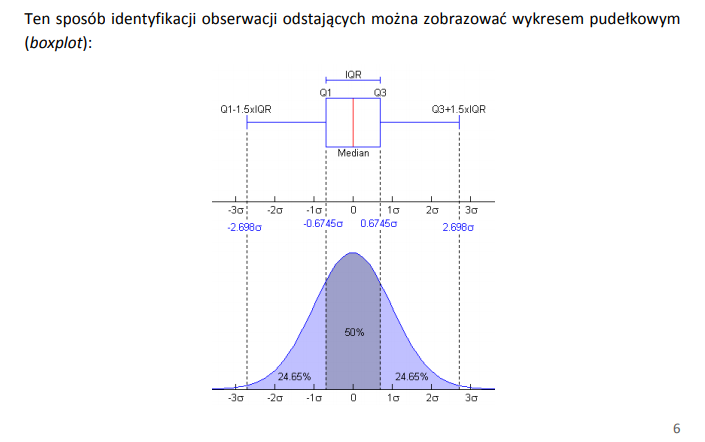

In [98]:
from IPython.display import Image
Image(filename='obserwacje_1.png')

2.  Najprostszym sposobem detekcji obserwacji odstających, opartym na analizie
wielowymiarowej, jest analiza odległości euklidesowych pomiędzy obserwacjami a ich
środkiem (wektorem średnich $m$):
$d_{Ei}=\sqrt{(x_{i}-m)^T(x_{i}-m)}$
3.  W przypadku rozkładu eliptycznego należy skorzystać z metryki Mahalanobisa, która
uwzględnia informacje o wariancjach poszczególnych składowych i korelacjach pomiędzy
nimi:
$d_{Mi}=\sqrt{(x_{i}-m)^TS^{-1}(x_{i}-m)}$

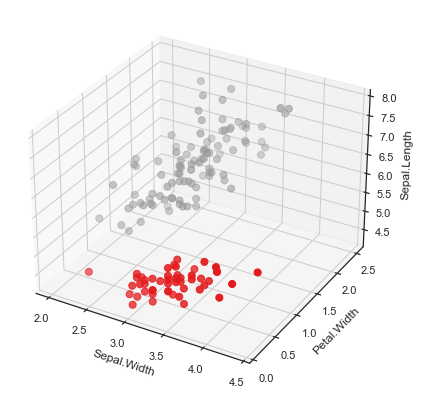

In [99]:
# import the data and remove any non-numeric columns
iris = pd.DataFrame(data('iris'))
iris = pd.DataFrame(iris.drop('Species', 1))
# apply DBSCAN clustering
db = DBSCAN(eps=0.9, min_samples=10).fit(iris)
iris['labels'] = db.labels_
# and plot the clusters
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(iris['Sepal.Width'], iris['Petal.Width'], iris['Sepal.Length'],
c=iris['labels'], cmap='Set1', s=50)
ax.set_xlabel('Sepal.Width')
ax.set_ylabel('Petal.Width')
ax.set_zlabel('Sepal.Length')
plt.show()
plt.clf()
plt.cla()
plt.close()

### 4.  metody selekcji cech

#### podstawy teoretyczne

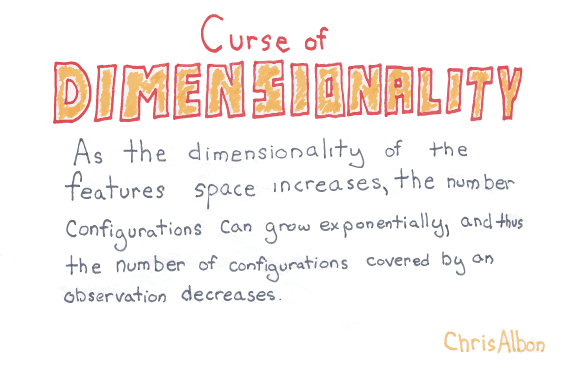

In [100]:
from IPython.display import Image
Image(filename='curse_of_dimensionalitty.png')

Ze względu na charakter problemu:
-   nadzorowane
-   nienadzorowane
Ze względu na relację z innymi algorytmami nadrzędnymi:
-   filtry
-   wrappery
-   frapery - kombinacja filtrów i wrapeperów
-   metody wbudowane

Metody cech:

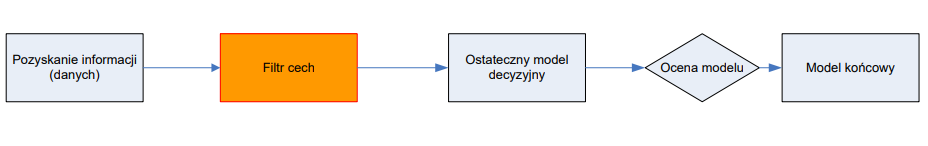

In [101]:
from IPython.display import Image
Image(filename='filtr_cech.png')

Metody opakowane:

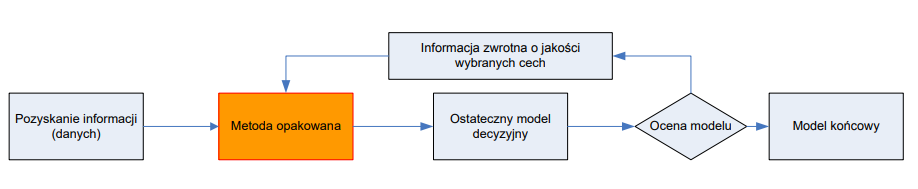

In [102]:
from IPython.display import Image
Image(filename='wrappery.png')

In [103]:
data = pd.read_csv("train.csv")
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

          Specs       Score
13     px_width  852.914979
14          ram  562.837207
0            id  223.566155
12    px_height   46.347162
9     mobile_wt   42.328627
5            fc   15.793117
11           pc   11.148155
7    int_memory    1.372252
3   clock_speed    1.052762
16         sc_w    0.809077


## 5.   zmniejszanie wymiarowości danych

### podstawy teoretyczne
W przypadku danych wielowymiarowych często przydatne jest zmniejszenie wymiarowości poprzez rzutowanie
danych na podprzestrzeń o niższym wymiarze, która przechwytuje „istotę” danych. Nazywa się to redukcją
wymiarowości.

In [104]:

def reduce_dimension(string, object):
    # define dataset
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=10, random_state=1)
    # define the pipeline
    steps = [('pca', PCA(n_components=10)), ('m', LogisticRegression())]
    model = Pipeline(steps=steps)
    # evaluate model
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # report performance
    print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

In [105]:
reduce_dimension('pca', PCA(n_components=10))

Accuracy: 0.901 (0.024)


In [106]:
reduce_dimension('lda', LinearDiscriminantAnalysis(n_components=1))

Accuracy: 0.901 (0.024)


### 6.  bagging

### podstawy teoretycznie
Mając standardowy zestaw treningowy $D$ o rozmiarze $n$, "bagging" generuje $m$ nowe
zestawy treningowe $D_{i}$, każdy o rozmiarze $n$, poprzez pobieranie próbek z $D$
równomiernie i wymiennie. Pobierając próbki z wymianą, niektóre obserwacje mogą być powtarzane w każdym
$D_{i}$. Jeśli $n' = n$, to dla dużych $n$ oczekuje się, że zbiór $D_{i}$
będzie miał ułamek $(1 - 1/e) ≈ 63,2% $ unikalnych próbek z $D$, reszta będąc duplikatami.Ten rodzaj próbki
jest znany jako $bootstrap sample$. Próbkowanie z wymianą zapewnia, że każdy $bootstrap$ jest niezależny
od swoich odpowiedników, ponieważ nie jest zależny od poprzednio wybranych próbek podczas $bootstrapingu$.
Następnie $m$ modeli dopasowuje się przy użyciu $m$ próbek $bootstrapowych$ i łączy przez uśrednienie danych
wyjściowych (dla regresji) lub $voting$ (dla klasyfikacji).

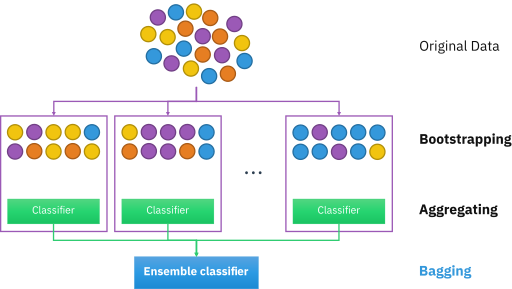

In [107]:
from IPython.display import Image
Image(filename='bagging.png')

In [108]:

def show_metrics(classifier, x_test, y_test):
    print("Score of classifier equals: {}".format(classifier.score(x_test,y_test)))
    ytest_pred=classifier.predict(x_test)
    print("Confusion matrix: \n {}".format(confusion_matrix(y_test, ytest_pred)))

In [109]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
rf = RandomForestClassifier(n_estimators=100)
bag_clf = BaggingClassifier(base_estimator=rf, n_estimators=100,bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
bag_clf.score(X_train,y_train), bag_clf.score(X_test,y_test)
show_metrics(bag_clf, X_test, y_test)

Score of classifier equals: 0.9333333333333333
Confusion matrix: 
 [[15  0  0]
 [ 0 18  1]
 [ 0  2  9]]


### 7.  boosting

#### podstawy teoretyczne

W uczeniu maszynowym $boosting$ jest zbiorowym algorytmem do rekudowania biasu oraz wariancji.
Boosting polega na pytaniu "Czy grupa słabych uczniów może stworzyć jednego silnego ucznia?"

W skrócie, AdaBoost działa w ten sposób, że w kolejnych iteracjach trenuje a następnie mierzy błąd
wszystkich dostępnych słabych klasyfikatorów. W każdej następnej iteracji "ważność" źle zakwalifikowanych
obserwacji jest zwiększana, tak że klasyfikatory zwracają na nie większą uwagę.

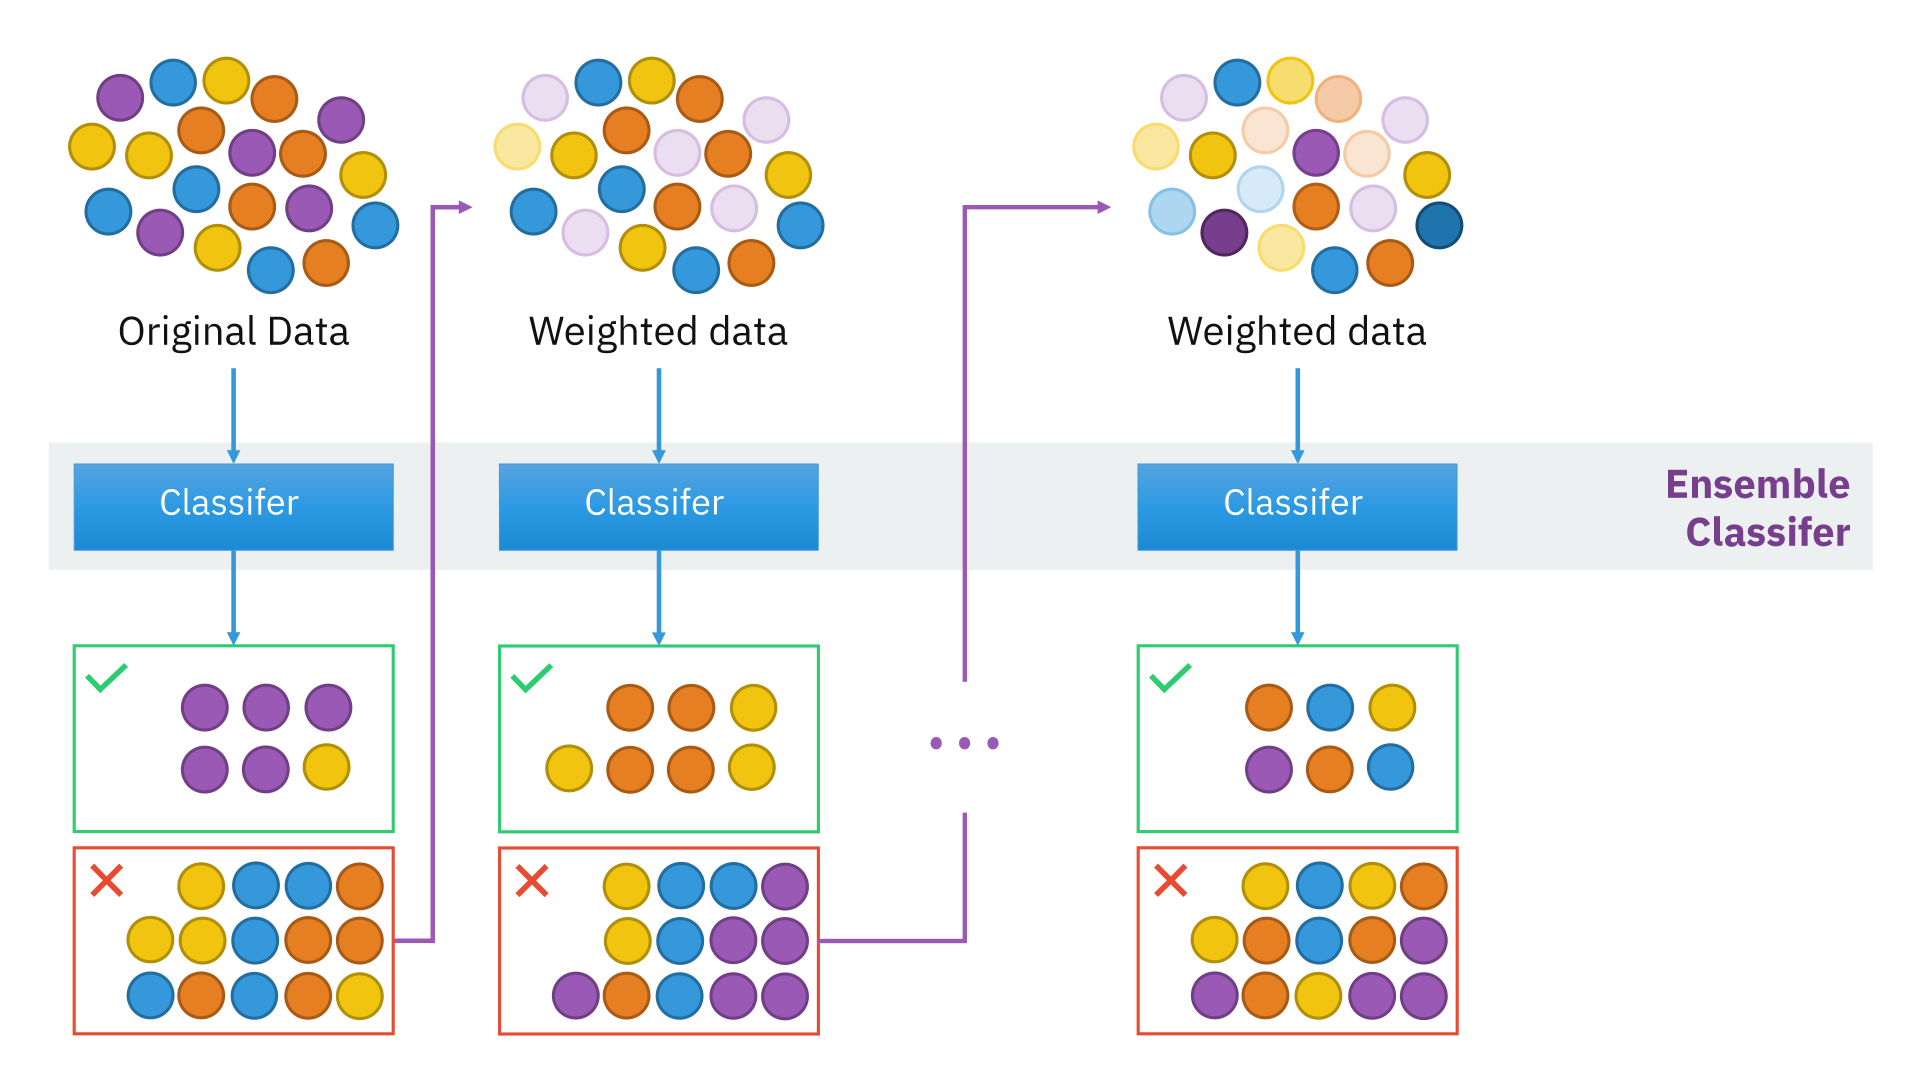

In [110]:
from IPython.display import Image
Image(filename='booting.png')

In [111]:

iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
gb = AdaBoostClassifier(n_estimators=100).fit(X_train, y_train)
gb.fit(X_train, y_train)
gb.score (X_test,y_test),gb.score (X_train,y_train)
show_metrics(gb, X_test, y_test)

Score of classifier equals: 0.9555555555555556
Confusion matrix: 
 [[14  0  0]
 [ 0 18  0]
 [ 0  2 11]]
